# Compare tweets and party programs

https://github.com/adsieg/text_similarity/blob/master/Different%20Embeddings%20%2B%20Cosine%20Similarity%20%2B%20HeatMap%20illustration.ipynb 

https://www.machinelearningplus.com/nlp/cosine-similarity/

As first steps, we import the required libraries and import the raw programm of Bündnis 90/Green Party.

- ``Numpy`` is used for several mathematical transformations as calculating the mean of the party programme's word vectors
- ``Matplotlib`` and ``Seaborn`` are used to create plots visualizing the similarity of Tweets and the party programmes' content
- ``Pandas`` is imported for data transformations of the final dataframe containing the tweets of our example MP (Annalena Baerbock)
- ``Nltk`` can be used for various NLP tasks, here: Removing (German) stopwords as well as splitting up words
- ``Gensim`` and ``fasttext`` are used to transform words into vectors that can be used for further similarity analysis
- ``cosine_similarity`` is imported from ``sklearn.metrics.pairwise`` for measuring the the similarity of Tweets and the party programmes' content




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime 
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
from gensim.models import Word2Vec
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import fasttext

### Storing Green programme in a new object

Since we are only considering Annalena Baerbock's tweets in the further analysis, we only need to store the program of her party (BÜndnis 90/Die Grünen)

In [2]:
programme = open('party_programmes/gruene.txt', "r").read()

### Writing function for turning raw party programmes into cleaned version

Here, only relevant information from the programmes is kept: 

- Only words (no numeric expressions, page numbers etc.) 
- All words are transformed to lower case and split up
- Stopwords that do not have a meaningful content are removed by keeping only words that are not in the list of German stopwords.

This function enables the user to enter a uncleaned party programme text and returns a cleaned version of the respective program. 

In [4]:
#Cleaning text 

#also stole this from: https://github.com/adsieg/text_similarity/blob/master/Different%20Embeddings%20%2B%20Cosine%20Similarity%20%2B%20HeatMap%20illustration.ipynb
def preprocess(raw_text):
    """
    Takes raw party programme text, returns cleaned party programme text

        Parameters:
                raw_text (str): Text file of extracted party programme

        Returns:
                A cleaned version of the party programme
    """
    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("german"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

gruene_cleaned = preprocess(programme)

In [126]:
# get pre-trained model

# downloaded a German word embedding model from http://devmount.github.io/GermanWordEmbeddings/#download 
# das github von dem dude: https://github.com/devmount/GermanWordEmbeddings/blob/master/code/pca.ipynb


What I would need to do, to make this work:
- Get a better embedding model for German language [done]
- Loop each word into the model and calculate the mean (or weighted mean) [done]
- then calculate the cosine distance [done]
- this can work. currently the main thing is the German Language Model.

# Trying with the German FastText Wiki Model

### Word representation model using the ``fasttext`` library

In the next step, we are using the ``fasttext`` library for learning word vectors and ultimately being able to assess the similarity between the Green party programme and Annalena Baerbock's tweets. Here we are using the pretrained word vectors for the German language and storing the models in new objects.

Here, we are using two distinct vector models: The first one has been trained on WIkipedia data. The second one addtionally relies on data from common crawl to train the model. 

In [ ]:
#source https://fasttext.cc/docs/en/pretrained-vectors.html 
ft_model_wiki = fasttext.load_model("language_models/wiki.de.bin")

In [135]:
#source https://fasttext.cc/docs/en/crawl-vectors.html
ft_model_cc_wiki = fasttext.load_model("language_models/cc.de.300.bin")

### Calculating word vectors

In order to be able to examine the similarity of tweets and party programmes, the text must be transformed into something mathematically comparable. For this purpose, we are using the above-mentioned vector models from the fasttext library. These models identify whether certain words are commonly used together and thus can be expected to be meanigfully interlinked. In the next step, the models transforms each word into a numeric vector. Words that are identified to be closely related are also closer together in the vector space. 

In [136]:
# Simple test how a vector looks. it is pretty
ft_model_wiki['Gruene']
ft_model_cc_wiki['Gruene']

array([-6.66586831e-02, -1.20093264e-01,  2.17122920e-02, -4.39679995e-02,
        1.71260838e-03,  1.33931994e-01,  7.26640150e-02,  4.74838801e-02,
       -4.67565209e-02, -9.32673085e-03, -8.86969492e-02,  1.16495393e-01,
        1.84771400e-02, -2.54264902e-02, -7.09674060e-02, -3.34988385e-02,
        1.34711841e-03, -4.90736179e-02,  3.76501456e-02,  1.02975540e-01,
        2.81355320e-03,  6.00518845e-02, -3.26939635e-02, -7.31652826e-02,
        8.60609143e-05, -1.24841563e-01,  1.32975830e-02,  5.85928522e-02,
        6.27549365e-03,  2.52863467e-02, -6.64956495e-02,  1.12517796e-01,
        1.07481264e-01,  7.51210898e-02, -5.08116446e-02,  7.28011280e-02,
       -3.73899974e-02,  6.09375676e-03, -2.99078021e-02, -6.12091310e-02,
        3.24815474e-02, -2.56212112e-02,  1.73820311e-03, -1.72924343e-02,
       -3.84134129e-02,  1.07680857e-01,  3.57731767e-02, -5.43604977e-02,
       -3.34484950e-02, -2.56891251e-02,  3.07286717e-02, -7.17754066e-02,
        3.76838855e-02, -

## Loading the tweets from Annalena Baerbock

In the next step, the dataframe created in the `data_preprocessing`-file is read in with ``pandas`` read_csv function and the created_at variable (time of tweets) is transformed to datetime format.

In [218]:
# load in Annalena Baerbock tweets 
annalena = pd.read_csv("baerbock_tweets.csv")
annalena['created_at'] = pd.to_datetime(annalena['created_at'])
annalena.head()


,Unnamed: 0,id,created_at,full_text,display_text_range,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,possibly_sensitive
0,0,1468233562742788111,2021-12-07 14:58:54+00:00,"Mit dem #Koalitionsvertrag, den SPD, FDP und w...","[0, 226]",NaN,NaN,False,10,288,False
1,1,1466482642942054400,2021-12-02 19:01:22+00:00,Mit der offiziellen Verabschiedung heute Abend...,"[0, 153]",2.179011e+09,ABaerbock,False,92,6208,NaN
2,2,1466482641578999817,2021-12-02 19:01:22+00:00,Sich selbst zurücknehmen zu können und in den ...,"[0, 153]",2.179011e+09,ABaerbock,False,93,5288,NaN
3,3,1466482640102510601,2021-12-02 19:01:21+00:00,Unser Land hat Angela Merkels politischer Ära ...,"[0, 212]",NaN,NaN,False,384,10470,NaN
4,4,1464983672415608834,2021-11-28 15:45:00+00:00,Jüdische Gemeinden in aller Welt feiern ab heu...,"[0, 237]",NaN,NaN,False,183,3558,NaN


### Example of matching an (artifical) tweet to the party programme

In the next step, the programme and an artificial tweet in string format are converted into a list of tokens and stored into separate objects. Additionally, the numpy and fasttext libraries are used to calculate the arithmetic mean of the word vectors of the programme and the tweets. 

In [ ]:
#mit einem fake sample tweet

cleaned_programm = gensim.utils.simple_preprocess(programme)
cleaned_tweet = gensim.utils.simple_preprocess("Karl Lauterbach hat ne geile Fliege und die ist rot")

program_vector = np.mean([ft_model[word] for word in cleaned_programm], axis = 0).reshape(1,-1)
tweet_vector = np.mean([ft_model[word] for word in cleaned_tweet], axis = 0).reshape(1,-1)

### Calculating similarity of programme and tweet vectors

Here, the cosine similarity between the programme vector (mean of all vectors in the program) and the tweet vector (mean of all vectors in the sample tweet) is caluclated. This is an appropriate choice for comparing programmes and tweets, since the length of the respective documents is not affecting the similariy metric.

In [220]:
cosine_similarity(program_vector, tweet_vector)

array([[0.71076447]], dtype=float32)

## Creating a function for cleaning programmes and tweets and calculating their similiarity

Here, we are creating a function that combines all the necessary steps to calculate the similarity of a party programme and tweets: 

1. The function requires a party programme, a dataframe containing tweets, and a language model that should be used to calculate the similarity
2. As a first step, the ``gensim`` library is used to transform both the program and the tweet dataframe into a list of tokens (function: ``simple_preprocess``)
3. Furthermore, ``numpy`` is used to calculate the mean of all vectors in the programme created by the specified language model
4. Ultimately, the vector mean is also calculated for the tweet dataframe. Furthermore, the cosine similarity is calculated for the mean tweets and programme vectors and the final dataframe ist returned. 

In [221]:
def get_similarities(party_programme, tweet_df, lang_model, model_name = None):
    """"
    Cleans programmes and tweets, calculates similarity and returns new data frame

        Parameters:
                party_programme (str): A dataframe containing a party programme
                tweet_df (str): A dataframe containing tweets
                lang_model (str): Model type for transforming programmes/tweets into vectors
                model_name (str): To be specified for naming the model

        Returns: 
                New dataframe with cleaned programmes/tweets and similarity measure   
    """""
    tweet_df = tweet_df.copy()

    #clean up the party program and the tweets
    cleaned_programm = gensim.utils.simple_preprocess(party_programme)
    cleaned_tweets = [gensim.utils.simple_preprocess(doc) for doc in tweet_df['full_text'].values]

    #calculate the document vector for the entire party programme (across the axis dimensions)
    program_vector = np.mean([lang_model[word] for word in cleaned_programm], axis = 0).reshape(1,-1)

    similarity_list = []
    #for each tweet
    for tweet in cleaned_tweets:

        #calculate the mean vector
        tweet_vector = np.mean([lang_model[word] for word in tweet], axis = 0).reshape(1,-1)

        #add to the final list
        similarity_list.append(cosine_similarity(program_vector,tweet_vector)[0][0])

    #add to the input df
    tweet_df['cleaned_tweets'] = cleaned_tweets
    tweet_df[f'w2v_cosine_similarity_{model_name}'] = similarity_list

    #return the df
    return tweet_df


## Creating a function that plots the similarity measure 

The following function takes a dataframe that includes the similarity measure for a programme's content and tweets, calculates its mean and uses ``matplotlib`` to create a histogram of the measure.

In [222]:
#get a nice plot

def similarity_histo(result_df, model_ending, name = "Annalena Baerbock"): #erstmal mit Annalena als default. 
    """
    Takes a data frame including similiarity measures and returns the plotted result
    """
    
    col_name = f'w2v_cosine_similarity_{model_ending}'
    #get the mean cosine similarity 
    mean_cosine = np.mean(result_df[col_name])

    #plot a histogram of similarities
    plt.hist(result_df[col_name])
    plt.xlabel(f"Cosine Similarity (Using {model_ending})")
    plt.title(f"The mean similarity of {name}'s tweets \nwith their party program was {mean_cosine}")
    
    return plt.show()

## Applying the functions

In the following chunks, the previously created functions to cleaning the programmes and tweets, calculating their similiarity and plotting the results are applied. For this purpose, we specify the Green party programm we stored in the object ``programme`` as the first parameter, the data frame containing Annalena Baerbock's tweets in the second, and the specified vector model in the third. As we can see below, we are conducting this step for both the common crawl trained model as well as the Wikipedia trained model. 

As a result, we can see that Baerbock's tweets have a high similarity with the Green party programme, with a mean of 0.91 using the common crawl trained model and 0.89 for the Wikipedia trained model. 

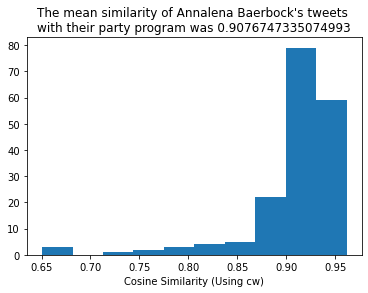

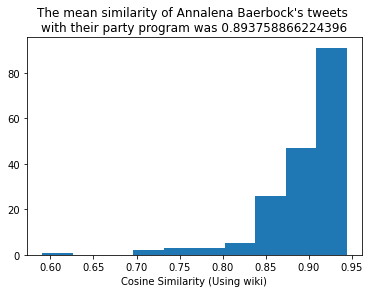

In [223]:
# find the similarity with different embedding models
out_df_cw = get_similarities(programme, annalena, ft_model_cc_wiki, "cw")
similarity_histo(out_df_cw, "cw")

out_df_wiki = get_similarities(programme, annalena, ft_model_wiki, "wiki")
similarity_histo(out_df_wiki, "wiki")

### Plotting similarity over time

Here, we are creating a function that takes the result dataframe and the chosen model and plots the development of the similarity model for Baerbock's tweets over time. Additionally, a dashed line is added at the point of the German Federal Election in order to be able to detect potential difference before and after the election. As we can see from the plot, the similarity measure stayed fairly constant over time. 

In [269]:
def time_series_plot(result_df, model_name, name = "Annalena Baerbock"):
"""
Takes a dataframe including similarity measure and plots similarity over time
"""

    # build timeseries plot
    plt.scatter(result_df['created_at'], result_df[f'w2v_cosine_similarity_{model_name}'], s = 0.5)
    plt.axvline(datetime.datetime(2021, 9, 26), color = 'red', ls = ':') # adding a line at the BTW


Applying the function to the previously created data frames, using both language model types

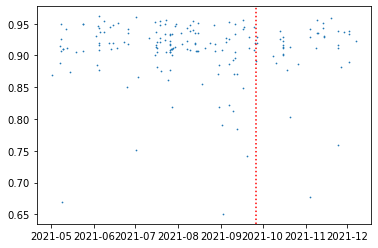

In [270]:
time_series_plot(out_df_cw, 'cw')

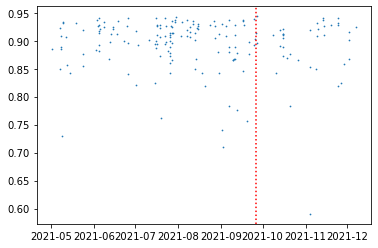

In [271]:
time_series_plot(out_df_wiki, 'wiki')

Comparing the similiarity measures of the two distinct model types and visualizing it in a scatterplot. As we can see, the two different model are highly correlated, indicating a high robustness of the results.

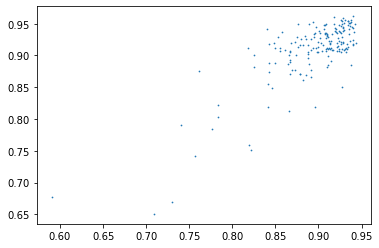

In [273]:
# let's double check if the models are actually saying something similar
plt.scatter(out_df_wiki['w2v_cosine_similarity_wiki'], out_df_cw['w2v_cosine_similarity_cw'], s = .5)